In [2]:
import pandas as pd
import numpy as np

In [18]:
# load raw data grey and white into data frames
df_grey = pd.read_csv('3077_feature_grey_500.csv', names=['x', 'y', 'avg_dist', 'points_count', 'std'], 
                 delimiter=',')
df_white = pd.read_csv('3077_feature_white_500.csv', names=['x', 'y', 'avg_dist', 'points_count', 'std'], 
                 delimiter=',')
df_white
#df_grey

,x,y,avg_dist,points_count,std
0,16031.3,394.96,306.697163,379,12.621463
1,16061.6,395.80,319.353984,376,13.080319
2,16037.2,401.40,312.155193,397,13.084301
3,16064.6,404.09,322.878522,404,13.659488
4,16029.2,410.61,310.470923,414,13.314970
...,...,...,...,...,...
394307,6665.0,20124.70,414.602503,558,20.643160
394308,6576.1,20129.20,405.957358,541,19.845689
394309,6617.5,20131.20,410.153462,552,20.257727
394310,6567.6,20131.60,403.307030,536,19.670333


In [7]:
from sklearn.ensemble import IsolationForest
clf_IOF = IsolationForest(behaviour='new', max_samples=len(df_grey), random_state=None, contamination='auto')

from sklearn.neighbors import LocalOutlierFactor
clf_LOF = LocalOutlierFactor(n_neighbors=20, contamination='auto')

In [17]:
# load in all the data and replace NaNs and merge all three files together
df_grey_medical = pd.read_csv('NA3777-02_AB-Grey.csv', delimiter='\t', encoding='utf8', header=0)
df_grey_medical = df_grey_medical.loc[df_grey_medical['Centroid X µm'].isin(df_grey['x']) & df_grey_medical['Centroid Y µm'].isin(df_grey['y'])]
# remove outliers and NaN data for grey before merge uising Isolation of forest
df_grey_medical = df_grey_medical.fillna(0)
df_grey_medical = df_grey_medical.drop(columns=['ROI', 'Class', 'Name', 'Centroid X µm', 'Centroid Y µm'])
df_grey_medical

,Nucleus: Area,Nucleus: Perimeter,Nucleus: Circularity,Nucleus: Max caliper,Nucleus: Min caliper,Nucleus: Eccentricity,Nucleus: Hematoxylin OD mean,Nucleus: Hematoxylin OD sum,Nucleus: Hematoxylin OD std dev,Nucleus: Hematoxylin OD max,...,Cell: Eccentricity,Cell: DAB OD mean,Cell: DAB OD std dev,Cell: DAB OD max,Cell: DAB OD min,Cytoplasm: DAB OD mean,Cytoplasm: DAB OD std dev,Cytoplasm: DAB OD max,Cytoplasm: DAB OD min,Nucleus/Cell area ratio
164,21.4801,18.4545,0.7926,7.4223,3.9101,0.8276,0.2429,23.0761,0.0525,0.3566,...,0.4731,0.1207,0.0505,0.2874,0.0196,0.1127,0.0474,0.2874,0.0196,0.1182
165,25.7761,18.4373,0.9529,6.5544,5.0270,0.5843,0.2596,28.3015,0.0647,0.3835,...,0.3551,0.1023,0.0619,0.2679,0.0015,0.0913,0.0590,0.2679,0.0015,0.1336
166,18.4476,15.8338,0.9247,6.1156,4.0216,0.7150,0.2787,24.5226,0.0807,0.4317,...,0.5718,0.0714,0.0514,0.2737,-0.0563,0.0599,0.0433,0.2262,-0.0563,0.1395
167,55.0902,40.4203,0.4237,18.2778,4.5295,0.9796,0.2538,56.8500,0.0536,0.4452,...,0.8194,0.0788,0.0489,0.2461,-0.0106,0.0590,0.0309,0.1701,-0.0106,0.2175
168,12.1299,14.8493,0.6913,5.8840,2.2532,0.9105,0.2065,13.6293,0.0560,0.3442,...,0.7933,0.0813,0.0431,0.1974,0.0230,0.0651,0.0281,0.1615,0.0230,0.1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382566,30.8303,22.1494,0.7897,8.2449,5.3986,0.7779,0.1859,23.6060,0.0631,0.3222,...,0.5104,0.1583,0.0886,0.4570,-0.0076,0.1295,0.0510,0.3520,-0.0076,0.1430
382567,21.4801,19.4670,0.7123,7.4732,4.2745,0.7683,0.1740,16.7066,0.0596,0.4024,...,0.7268,0.1940,0.1431,0.8183,0.0263,0.1623,0.1184,0.7561,0.0263,0.1439
382568,17.9422,15.2955,0.9637,5.7317,4.0216,0.6383,0.1741,14.9734,0.0592,0.3056,...,0.4761,0.1739,0.0925,0.7148,0.0147,0.1667,0.0936,0.7148,0.0147,0.0946
382569,19.4585,17.1069,0.8356,6.8375,4.1859,0.7756,0.1457,11.5141,0.0450,0.2444,...,0.5697,0.1951,0.1590,0.7065,0.0013,0.1670,0.1388,0.7065,0.0013,0.1006


In [1]:
df_white_medical = pd.read_csv('NA3777-02_AB-White.csv', delimiter='\t', encoding='utf8', header=0)
df_white_medical = df_white_medical.loc[df_grey_medical['Centroid X µm'].isin(df_white['x']) & df_white_medical['Centroid Y µm'].isin(df_white['y'])]
# remove outliers and NaN data for white before merge using Isolation of forest
df_white_medical = df_white_medical.fillna(0)
df_white_medical = df_white_medical.drop(columns=['ROI', 'Class', 'Name', 'Centroid X µm', 'Centroid Y µm'])
df_white_medical

NameError: name 'pd' is not defined

In [6]:
# remove outliers and NaN data for grey before merge uising Isolation of forest
df_grey = df_grey.fillna(0)
classes = clf_IOF.fit_predict(df_grey)
outlier_classes_grey = np.where(classes == -1)[0]
print(len(outlier_classes_grey))
df_grey = df_grey.drop(df_grey.index[outlier_classes_grey.tolist()])

14843


In [7]:
# remove outliers and NaN data for white before merge using Isolation of forest
df_white = df_white.fillna(0)
classes = clf_IOF.fit_predict(df_white)
outlier_classes_white = np.where(classes == -1)[0]
print(len(outlier_classes_white))
df_white = df_white.drop(df_white.index[outlier_classes_white.tolist()])

23346


In [144]:
# remove outliers and NaN data for grey before merge uising LocalOutlierFactor
# classes = clf_LOF.fit_predict(df_grey)
# outlier_classes_grey = np.where(classes == -1)[0]
# print(len(outlier_classes_grey))

In [145]:
# remove outliers and NaN data for white before merge uising LocalOutlierFactor
# classes = clf_LOF.fit_predict(df_white)
# outlier_classes_white = np.where(classes == -1)[0]
# print(len(outlier_classes_white))

In [8]:
df_grey['white_grey'] = np.zeros((len(df_grey),))
df_white['white_grey'] = np.ones((len(df_white),))
result = pd.concat([df_grey, df_white], ignore_index=True)
result = result.sample(frac=1).reset_index(drop=True)
result = result.fillna(0)
result = result.drop(columns=['x', 'y', 'side_dist'])

In [9]:
# construct a training and testing dataset
msk = np.random.rand(len(result)) < 0.66
train = result[msk]
test = result[~msk]
train

,avg_dist,points_count,std,white_grey
2,393.536693,368,15.951476,0.0
3,370.644107,312,14.024584,0.0
6,372.023904,753,21.880470,1.0
8,384.235261,262,14.149461,0.0
10,360.695688,840,22.522680,1.0
...,...,...,...,...
737294,388.841914,1153,28.163257,0.0
737295,378.215791,2813,42.542502,1.0
737299,371.394772,341,14.622127,0.0
737300,397.821289,513,19.535345,0.0


In [10]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [11]:
import keras
normal = keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=1)

classifier = Sequential()
# first hidden layer
classifier.add(Dense(128, activation='sigmoid', use_bias=True, kernel_initializer=normal, input_dim=3))

# second hidden layer
classifier.add(Dense(128, activation='sigmoid', use_bias=True, kernel_initializer=normal))

# third hidden layer
classifier.add(Dense(16, activation='relu', use_bias=True, kernel_initializer=normal))

# output layer
classifier.add(Dense(2, activation='softmax', use_bias=True, kernel_initializer=normal))

In [12]:
from keras import optimizers
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
#sgd = optimizers.SGD(lr=0.01)
classifier.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['accuracy'])

In [13]:
# reconstruct data for training 
X_train = train.drop(columns=['white_grey'])
Y_train = np.array(train['white_grey'])
X_test = test.drop(columns=['white_grey'])
Y_test = np.array(test['white_grey'])

temp_ls = []
test_ls = []
for ele in Y_train:
    temp = [0] * 2
    temp[int(ele)] = 1
    temp_ls.append(temp)
    
for ele in Y_test:
    temp = [0] * 2
    temp[int(ele)] = 1 
    test_ls.append(temp)
Y_train = np.array(temp_ls)
Y_test = np.array(test_ls)

In [14]:
classifier.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=100, epochs=20)


Train on 487076 samples, validate on 250227 samples
Epoch 1/20
487076/487076 [==============================] - 16s 33us/step - loss: 0.2976 - accuracy: 0.8810 - val_loss: 0.2739 - val_accuracy: 0.8843
Epoch 2/20
487076/487076 [==============================] - 13s 28us/step - loss: 0.2778 - accuracy: 0.8823 - val_loss: 0.2744 - val_accuracy: 0.8821
Epoch 3/20
487076/487076 [==============================] - 14s 28us/step - loss: 0.2767 - accuracy: 0.8824 - val_loss: 0.2748 - val_accuracy: 0.8817
Epoch 4/20
487076/487076 [==============================] - 14s 29us/step - loss: 0.2757 - accuracy: 0.8827 - val_loss: 0.2717 - val_accuracy: 0.8846
Epoch 5/20
487076/487076 [==============================] - 13s 27us/step - loss: 0.2752 - accuracy: 0.8834 - val_loss: 0.2709 - val_accuracy: 0.8846
Epoch 6/20
487076/487076 [==============================] - 13s 28us/step - loss: 0.2751 - accuracy: 0.8828 - val_loss: 0.2738 - val_accuracy: 0.8814
Epoch 7/20
487076/487076 [=====================

In [15]:
#layer1=classifier.layers[0].get_weights()


In [17]:
#classifier.predict(X_test)

In [25]:
import csv
import time
import numpy as np
import matplotlib.patches as patches
from matplotlib import pyplot as plt

In [26]:
df_grey = pd.read_csv('feature_grey_500.csv', names=['x', 'y', 'avg_dist', 'points_count', 'std', 'side_dist'], 
                 delimiter=',')
df_white = pd.read_csv('feature_white_500.csv', names=['x', 'y', 'avg_dist', 'points_count', 'std', 'side_dist'], 
                 delimiter=',')
df_grey = df_grey.fillna(0)
df_white = df_white.fillna(0)

In [27]:
result = pd.concat([df_grey, df_white], ignore_index=True)
coord = result[['x', 'y']]
result = result.drop(columns=['x', 'y', 'side_dist'])
result

,avg_dist,points_count,std
0,360.406680,163,9.867782
1,320.647344,155,8.736548
2,328.344749,153,8.774696
3,322.128146,167,9.218660
4,320.681444,168,9.172623
...,...,...,...
775487,414.602503,558,20.643160
775488,405.957358,541,19.845689
775489,410.153462,552,20.257727
775490,403.307030,536,19.670333


In [28]:
coord

,x,y
0,18387.5,250.96
1,19223.2,252.09
2,18637.1,252.25
3,19157.6,253.07
4,19168.7,254.19
...,...,...
775487,6665.0,20124.70
775488,6576.1,20129.20
775489,6617.5,20131.20
775490,6567.6,20131.60


In [29]:
predict_val = classifier.predict(result)
outcome = np.argmax(predict_val, axis=1)

In [ ]:
print(outcome)

In [30]:
white_x = []
white_y = []
grey_x = []
grey_y = []
for index, row in coord.iterrows():
    if outcome[index] == 1:
        white_x.append(row['x'])
        white_y.append(row['y'])
    else:
        grey_x.append(row['x'])
        grey_y.append(row['y'])

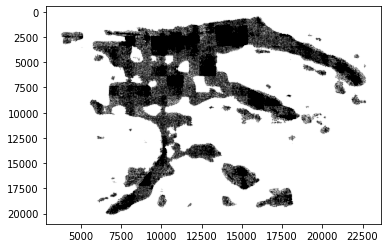

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(white_x, white_y, c='black', s=0.001, marker='.')
ax.invert_yaxis()
plt.savefig('white_300.png')

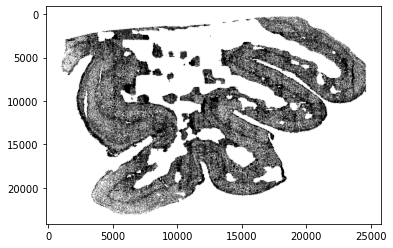

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(grey_x, grey_y, c='black', s=0.001, marker='.')
ax.invert_yaxis()
plt.savefig('grey_300.png')